In [1]:
import numpy as np
import pandas as pd
# to designate max columns
pd.set_option('display.max_columns', 50)

load the race_data

In [2]:
race_df = pd.read_csv("../data/csv/race_data/race-1986.csv", sep = ",")
for y in range(1986, 2022):
    race_tmp_df = pd.read_csv("../data/csv/race_data/race-" + str(y) + ".csv", sep = ",")
    race_df = pd.concat([race_df, race_tmp_df], axis = 0)

In [3]:
print(len(race_df['race_id'].unique()))
print(race_df.shape)
race_df.tail(5)

20385
(281780, 23)


,race_id,race_round,race_title,race_distance,weather,ground_condition,time,date,place,total_horse_number,order,frame_number,horse_number,horse_id,sex_and_age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop
13060,202009060812,12 R,2020ファイナルS,芝右1400m,天候 : 晴,芝 : 良,発走 : 16:25\n\n過去の2020ファイナルS,2020年12月27日,6回阪神8日目,14,10,3,4,2016103242,牡4,57.0,5429,1:22.3,1-1,35.3,22.6,456(+2),8.0
13061,202009060812,12 R,2020ファイナルS,芝右1400m,天候 : 晴,芝 : 良,発走 : 16:25\n\n過去の2020ファイナルS,2020年12月27日,6回阪神8日目,14,11,6,9,2016105630,牝4,55.0,1150,1:22.3,7-7,34.4,6.9,424(-6),4.0
13062,202009060812,12 R,2020ファイナルS,芝右1400m,天候 : 晴,芝 : 良,発走 : 16:25\n\n過去の2020ファイナルS,2020年12月27日,6回阪神8日目,14,12,5,8,2016102534,牡4,57.0,1015,1:22.5,7-7,34.6,17.2,468(-2),7.0
13063,202009060812,12 R,2020ファイナルS,芝右1400m,天候 : 晴,芝 : 良,発走 : 16:25\n\n過去の2020ファイナルS,2020年12月27日,6回阪神8日目,14,13,7,12,2015101399,牝5,55.0,732,1:22.6,9-10,34.4,6.8,464(+2),3.0
13064,202009060812,12 R,2020ファイナルS,芝右1400m,天候 : 晴,芝 : 良,発走 : 16:25\n\n過去の2020ファイナルS,2020年12月27日,6回阪神8日目,14,取,5,7,2016110041,牝4,55.0,1174,NaN,NaN,NaN,---,計不,NaN


confirm total_horse_number

In [4]:
race_df["total_horse_number"].value_counts()

16    101968
15     28770
14     27062
18     24858
13     23010
12     21168
11     17424
10     12690
9       9459
17      6103
8       5256
7       2247
6        894
5        250
20       140
22       132
21       126
24       120
19        57
23        46
Name: total_horse_number, dtype: int64

race_round

In [5]:
race_df['race_round'].unique()

array(['1 R', '9 R', '11 R', '10 R', '8 R', '2 R', '3 R', '6 R', '4 R',
       '7 R', '5 R', '12 R'], dtype=object)

In [6]:
race_df['race_round'] = race_df['race_round'].str.strip('R \n')

In [7]:
race_df['race_round'].unique()

array(['1', '9', '11', '10', '8', '2', '3', '6', '4', '7', '5', '12'],
      dtype=object)

In [8]:
race_df['race_round'] = race_df['race_round'].astype(int)
race_df['race_round'].dtypes

dtype('int64')

race rank

In [9]:
race_rank = race_df["race_title"].str.extract('(G1|G2|G3)', expand = True)
race_rank.columns = {"race_rank"}

race_df = pd.concat([race_df, race_rank], axis = 1)
race_df.fillna(value = {'race_rank': 0}, inplace = True) # 元もデータに反映
race_df['race_rank'] = race_df['race_rank'].replace('G1', 10)
race_df['race_rank'] = race_df['race_rank'].replace('G2', 5)
race_df['race_rank'] = race_df['race_rank'].replace('G3', 3)

#race_df = race_df.rename(columns = {"race_title": "race_rank"})

In [10]:
print("race_rank:", race_df["race_rank"].value_counts())

race_rank: 0     222047
3      32101
5      15670
10     11962
Name: race_rank, dtype: int64


In [11]:
# delete initial column
race_df.drop(['race_title'], axis = 1, inplace = True)

In [12]:
race_df.head(3)

,race_id,race_round,race_distance,weather,ground_condition,time,date,place,total_horse_number,order,frame_number,horse_number,horse_id,sex_and_age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank
0,198605010101,1,ダ左1700m,天候 : 晴,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,1,5,5,1982503021,牡5,56.0,632,1:48.3,3-1-1,53.1,1.0,514(+12),NaN,0
1,198605010101,1,ダ左1700m,天候 : 晴,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,2,3,3,1983502673,牡4,53.0,501,1:50.0,6-4-2,54.2,3.9,446(+2),NaN,0
2,198605010101,1,ダ左1700m,天候 : 晴,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,3,4,4,1982500899,牝5,54.0,186,1:51.5,2-2-2,56.3,42.1,432(+4),NaN,0


race distance

In [13]:
race_df["race_distance"].unique()

array(['ダ左1700m', 'ダ左1400m', '芝左1600m', '芝右 外1200m', '芝右2000m',
       '芝右 外1600m', 'ダ右1800m', '芝右 外-内3200m', '芝右 外2200m', '芝右1200m',
       'ダ右1400m', '芝右 外2400m', '芝左1400m', '芝左1800m', 'ダ左1600m', '芝左2500m',
       '芝右1800m', '芝左2000m', 'ダ左2200m', '芝右1400m', '芝右1600m', '芝右2500m',
       '芝右2200m', '芝左2400m', '芝右 外1400m', '芝右 外3200m', '芝右 外2000m',
       '芝左2300m', 'ダ右1500m', 'ダ右1200m', 'ダ右2000m', '芝右1700m', 'ダ右1000m',
       '芝右1000m', 'ダ左1000m', '芝右 外3000m', '芝右3000m', '芝右 内2周3600m',
       '芝左1200m', '芝左3200m', '芝左2200m', 'ダ右1700m', '芝左1700m', 'ダ左1200m',
       '芝右 外1800m', 'ダ左2300m', '芝左3000m', '芝左2800m', '芝右3200m', '芝右1500m',
       'ダ左2100m', '芝右2600m', 'ダ右2400m', '芝左 外2000m', '芝左 外1800m',
       '芝直線1000m', '芝左 外1600m', 'ダ左1800m', 'ダ左1300m', '芝左3400m',
       'ダ左2400m', 'ダ右1150m', 'ダ右1900m', 'ダ左1900m', '芝右 外2600m'],
      dtype=object)

In [14]:
ground_type = race_df["race_distance"].str.extract('(芝|ダ)', expand = True)
circle = race_df["race_distance"].str.extract('(右|左)', expand = True)
distance = race_df["race_distance"].str.extract('(\d+)m', expand = True)

ground_type.columns = {"ground_type"}
circle.columns = {"circle"}
distance.columns = {"distance"}

race_df = pd.concat([race_df, ground_type], axis = 1)
race_df = pd.concat([race_df, circle], axis = 1)
race_df = pd.concat([race_df, distance], axis = 1)

race_df = pd.get_dummies(race_df, columns = ["ground_type", "circle"])

In [15]:
# delete initial column
race_df.drop(['race_distance'], axis = 1, inplace = True)

In [16]:
race_df["distance"] = race_df["distance"].astype(int)

In [17]:
race_df.head(3)

,race_id,race_round,weather,ground_condition,time,date,place,total_horse_number,order,frame_number,horse_number,horse_id,sex_and_age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左
0,198605010101,1,天候 : 晴,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,1,5,5,1982503021,牡5,56.0,632,1:48.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1
1,198605010101,1,天候 : 晴,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,2,3,3,1983502673,牡4,53.0,501,1:50.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1
2,198605010101,1,天候 : 晴,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,3,4,4,1982500899,牝5,54.0,186,1:51.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1


weather

In [18]:
race_df["weather"].unique()

array(['天候 : 晴', '天候 : 曇', '天候 : 小雪', '天候 : 雨', '天候 : 雪', '天候 : 小雨'],
      dtype=object)

In [19]:
weather = race_df["weather"].str.extract('(晴|曇|小雨|雨|小雪|雪)', expand = True)

weather.columns = {"weather_circumstance"}

race_df = pd.concat([race_df, weather], axis = 1)

race_df = pd.get_dummies(race_df, columns = ["weather_circumstance"])

In [20]:
# delete initial column
race_df.drop(['weather'], axis = 1, inplace = True)

In [21]:
race_df.head(3)

,race_id,race_round,ground_condition,time,date,place,total_horse_number,order,frame_number,horse_number,horse_id,sex_and_age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪
0,198605010101,1,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,1,5,5,1982503021,牡5,56.0,632,1:48.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0
1,198605010101,1,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,2,3,3,1983502673,牡4,53.0,501,1:50.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0
2,198605010101,1,ダート : 良,発走 : 10:00,1986年1月25日,1回東京1日目,6,3,4,4,1982500899,牝5,54.0,186,1:51.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0


ground_condition

In [22]:
race_df["ground_condition"].unique()

array(['ダート : 良', '芝 : 良', '芝 : 重', 'ダート : 重', '芝 : 不良', '芝 : 稍重',
       'ダート : 稍重', 'ダート : 不良'], dtype=object)

In [23]:
race_df["ground_condition"] = race_df["ground_condition"].replace('(不良)', 4, regex = True)
race_df["ground_condition"] = race_df["ground_condition"].replace('(稍重)', 2, regex = True)
race_df["ground_condition"] = race_df["ground_condition"].replace('(重)', 3, regex = True)
race_df["ground_condition"] = race_df["ground_condition"].replace('(良)', 1, regex = True)

In [24]:
print("ground_condition:", race_df["ground_condition"].value_counts())

ground_condition: 1    216727
2     36156
3     18355
4     10542
Name: ground_condition, dtype: int64


In [25]:
race_df.head(3)

,race_id,race_round,ground_condition,time,date,place,total_horse_number,order,frame_number,horse_number,horse_id,sex_and_age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪
0,198605010101,1,1,発走 : 10:00,1986年1月25日,1回東京1日目,6,1,5,5,1982503021,牡5,56.0,632,1:48.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0
1,198605010101,1,1,発走 : 10:00,1986年1月25日,1回東京1日目,6,2,3,3,1983502673,牡4,53.0,501,1:50.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0
2,198605010101,1,1,発走 : 10:00,1986年1月25日,1回東京1日目,6,3,4,4,1982500899,牝5,54.0,186,1:51.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0


datetime

In [26]:
race_df["date"] = pd.to_datetime(race_df['date'], format = '%Y年%m月%d日')

In [27]:
race_df.drop(["time"], axis = 1, inplace = True)

In [28]:
print(race_df["date"].dtype)
print("date isnull sum: ", race_df["date"].isnull().sum())
race_df.head(3)

datetime64[ns]
date isnull sum:  0


,race_id,race_round,ground_condition,date,place,total_horse_number,order,frame_number,horse_number,horse_id,sex_and_age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪
0,198605010101,1,1,1986-01-25,1回東京1日目,6,1,5,5,1982503021,牡5,56.0,632,1:48.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0
1,198605010101,1,1,1986-01-25,1回東京1日目,6,2,3,3,1983502673,牡4,53.0,501,1:50.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0
2,198605010101,1,1,1986-01-25,1回東京1日目,6,3,4,4,1982500899,牝5,54.0,186,1:51.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0


place

In [29]:
race_df["place"] = race_df["place"].str.replace('\d*回(..)\d*日目',r'\1')

In [30]:
race_df["place"].unique()

array(['東京', '中山', '中京', '京都', '阪神', '小倉', '新潟', '札幌', '福島', '函館'],
      dtype=object)

In [31]:
race_df = pd.get_dummies(race_df, columns = ["place"])

sex_and_age

In [32]:
race_df["sex_and_age"].unique()

array(['牡5', '牡4', '牝5', '牝4', '牡8', '牝6', '牡7', '牡6', '牝7', '牡9', '牝8',
       'セ4', 'セ6', '牡10', 'セ8', '牡3', '牝3', 'セ5', 'セ9', 'セ7', 'セ3', '牝9',
       '牝10', 'セ10', '牡11', '牡13', '牡14', '牡15', '牡2', '牝2', 'セ2', 'セ12',
       '牡12', 'セ11'], dtype=object)

In [33]:
sex = race_df["sex_and_age"].str.extract('(牡|牝|セ)', expand = True)
sex.columns = {"sex"}
race_df = pd.concat([race_df, sex], axis = 1)
race_df = pd.get_dummies(race_df, columns = ["sex"])

race_df["sex_and_age"] = race_df["sex_and_age"].str.strip("牡牝セ")
race_df["sex_and_age"] = race_df["sex_and_age"].astype(int)
race_df = race_df.rename(columns = {"sex_and_age": "age"})

In [34]:
race_df.head(3)

,race_id,race_round,ground_condition,date,total_horse_number,order,frame_number,horse_number,horse_id,age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡
0,198605010101,1,1,1986-01-25,6,1,5,5,1982503021,5,56.0,632,1:48.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,198605010101,1,1,1986-01-25,6,2,3,3,1983502673,4,53.0,501,1:50.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,198605010101,1,1,1986-01-25,6,3,4,4,1982500899,5,54.0,186,1:51.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


burden_weight

In [35]:
race_df["burden_weight"].unique()

array([56. , 53. , 54. , 48. , 51. , 57. , 61. , 55. , 52. , 50. , 58. ,
       59. , 65. , 49. , 60. , 52.5, 53.5, 62. , 58.5, 57.5, 63.5, 56.5,
       55.5, 63. , 60.5, 50.5, 49.5, 59.5, 64.5, 64. , 54.5, 61.5, 51.5,
       67.5, 67. , 68. , 70. , 66. , 48.5, 62.5])

In [36]:
race_df["burden_weight"] = race_df["burden_weight"].astype(float)

In [37]:
race_df["burden_weight"] = race_df["burden_weight"]

In [38]:
race_df.head(3)

,race_id,race_round,ground_condition,date,total_horse_number,order,frame_number,horse_number,horse_id,age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡
0,198605010101,1,1,1986-01-25,6,1,5,5,1982503021,5,56.0,632,1:48.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,198605010101,1,1,1986-01-25,6,2,3,3,1983502673,4,53.0,501,1:50.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,198605010101,1,1,1986-01-25,6,3,4,4,1982500899,5,54.0,186,1:51.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


order

In [39]:
race_df["order"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '取', '14', '15', '中', '16', '17', '18', '19', '20', '21',
       '22', '23', '除', '失', '24', '13(降)', '16(降)', '18(降)', '4(降)',
       '8(降)', '5(降)', '12(降)', '10(降)', '7(降)', '2(降)', '11(降)', '14(降)',
       '15(降)', '6(降)', '3(降)', '9(降)', '17(降)'], dtype=object)

In [40]:
race_df = race_df[(race_df["order"] != "取") & (race_df["order"] != "除") & (race_df["order"] != "中") & (race_df["order"] != "失")]
race_df['order'] = race_df['order'].apply(lambda x: x.replace("(降)", ""))

In [41]:
race_df["order"] = race_df["order"].astype(int)

goal_time

In [42]:
race_df["goal_time"].isnull().sum()

0

In [43]:
race_df['goal_time'] = pd.to_datetime(race_df['goal_time'], format='%M:%S.%f') - pd.to_datetime('00:00.0', format='%M:%S.%f')
race_df['goal_time'] = race_df['goal_time'].dt.total_seconds()

In [44]:
race_df.head(3)

,race_id,race_round,ground_condition,date,total_horse_number,order,frame_number,horse_number,horse_id,age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡
0,198605010101,1,1,1986-01-25,6,1,5,5,1982503021,5,56.0,632,108.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,198605010101,1,1,1986-01-25,6,2,3,3,1983502673,4,53.0,501,110.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,198605010101,1,1,1986-01-25,6,3,4,4,1982500899,5,54.0,186,111.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


velocity

In [45]:
# velocity = pd.DataFrame(columns = ["velocity"])
# race_df = pd.concat([race_df, velocity], axis=1)
# race_df["velocity"] = race_df["distance"] / race_df["goal_time"]


In [46]:
# race_df.drop(['goal_time'], axis = 1, inplace = True)

In [47]:
race_df.head(3)

,race_id,race_round,ground_condition,date,total_horse_number,order,frame_number,horse_number,horse_id,age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡
0,198605010101,1,1,1986-01-25,6,1,5,5,1982503021,5,56.0,632,108.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,198605010101,1,1,1986-01-25,6,2,3,3,1983502673,4,53.0,501,110.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,198605010101,1,1,1986-01-25,6,3,4,4,1982500899,5,54.0,186,111.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


last_time

31.5
79.2


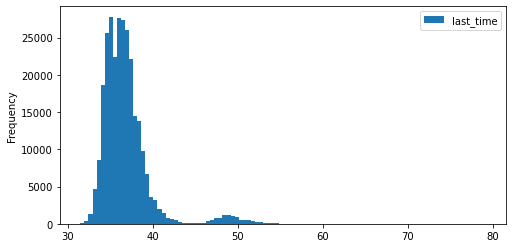

In [48]:
race_df.plot(kind='hist', y='last_time' , bins=100, figsize=(8,4))
print(race_df["last_time"].min())
print(race_df["last_time"].max())

In [49]:
print(race_df.loc[race_df.order == 1,"last_time"].mean())
print(race_df.loc[race_df.order == 2,"last_time"].mean())
print(race_df.loc[race_df.order == 3,"last_time"].mean())

36.09677309947187
36.228728665632275
36.331714645730344


In [50]:
# apply tabh(x)
#race_df["last_time"] = np.tanh(race_df["last_time"] - 35.0) + 1.0


In [51]:
#race_df.plot(kind='hist', y='last_time' , bins=100, figsize=(8,4))
print("min: ",race_df["last_time"].min())
print("mean: ",race_df["last_time"].mean())
print("max: ",race_df["last_time"].max())
print("first mean: ",race_df.loc[race_df.order == 1,"last_time"].mean())
print("second mean: ",race_df.loc[race_df.order == 2,"last_time"].mean())
print("third mean: ",race_df.loc[race_df.order == 3,"last_time"].mean())
print("first min: ",race_df.loc[race_df.order == 1,"last_time"].min())
print("second min: ",race_df.loc[race_df.order == 2,"last_time"].min())
print("third min: ",race_df.loc[race_df.order == 3,"last_time"].min())
print("first max: ",race_df.loc[race_df.order == 1,"last_time"].max())
print("second max: ",race_df.loc[race_df.order == 2,"last_time"].max())
print("third max: ",race_df.loc[race_df.order == 3,"last_time"].max())

print("seven min: ",race_df.loc[race_df.order == 7,"last_time"].min())
print("twelve min: ",race_df.loc[race_df.order == 12,"last_time"].min())

min:  31.5
mean:  36.828602617746796
max:  79.2
first mean:  36.09677309947187
second mean:  36.228728665632275
third mean:  36.331714645730344
first min:  31.6
second min:  31.7
third min:  31.6
first max:  54.5
second max:  55.2
third max:  56.3
seven min:  31.5
twelve min:  32.2


<AxesSubplot:ylabel='Frequency'>

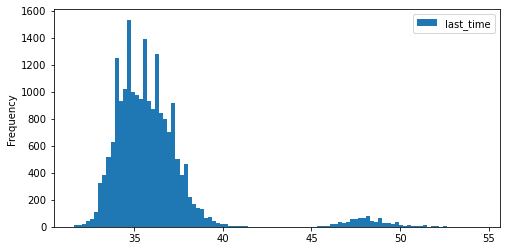

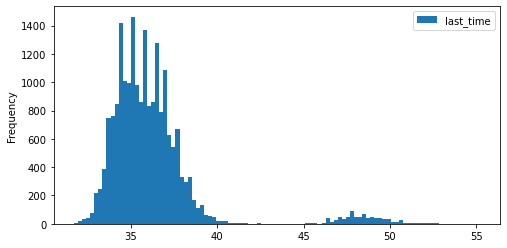

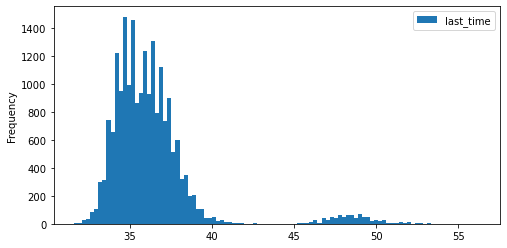

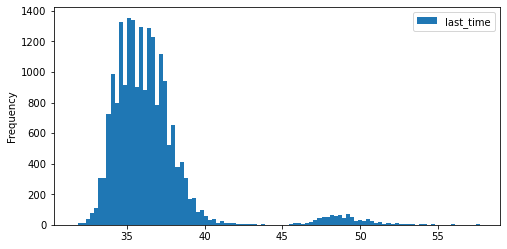

In [52]:
race_df.loc[race_df.order == 1].plot(kind='hist', y='last_time' , bins=100, figsize=(8,4))
race_df.loc[race_df.order == 2].plot(kind='hist', y='last_time' , bins=100, figsize=(8,4))
race_df.loc[race_df.order == 3].plot(kind='hist', y='last_time' , bins=100, figsize=(8,4))
race_df.loc[race_df.order == 5].plot(kind='hist', y='last_time' , bins=100, figsize=(8,4))

In [53]:
race_df.head(3)

,race_id,race_round,ground_condition,date,total_horse_number,order,frame_number,horse_number,horse_id,age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡
0,198605010101,1,1,1986-01-25,6,1,5,5,1982503021,5,56.0,632,108.3,3-1-1,53.1,1.0,514(+12),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,198605010101,1,1,1986-01-25,6,2,3,3,1983502673,4,53.0,501,110.0,6-4-2,54.2,3.9,446(+2),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,198605010101,1,1,1986-01-25,6,3,4,4,1982500899,5,54.0,186,111.5,2-2-2,56.3,42.1,432(+4),NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


odds

In [54]:
race_df["odds"] = race_df["odds"].astype(float)

horse_weight

In [55]:
horse_weight_dif = race_df["horse_weight"].str.extract('\(([-|+]?\d*)\)', expand=True)
horse_weight_dif.columns ={"horse_weight_dif"}

race_df = pd.concat([race_df, horse_weight_dif], axis=1)

race_df['horse_weight'] = race_df['horse_weight'].replace('\(([-|+]?\d*)\)', '', regex=True)

In [56]:
race_df['horse_weight'] = race_df['horse_weight'].replace('計不', np.nan)
race_df['horse_weight'] = race_df['horse_weight'].astype(float)
race_df['horse_weight_dif'] = race_df['horse_weight_dif'].astype(float)

In [57]:
no_records = race_df[race_df['horse_weight'].isnull()]['horse_id']
for no_record_id in no_records:
    race_df.loc[(race_df['horse_id'] == no_record_id)&(race_df['horse_weight'].isnull()), 'horse_weight'] = race_df[race_df['horse_id'] == no_record_id]['horse_weight'].mean() 
    race_df.loc[(race_df['horse_id'] == no_record_id)&(race_df['horse_weight_dif'].isnull()), 'horse_weight_dif'] = 0 
    

In [58]:
race_df["horse_weight"].isnull().sum()

0

In [59]:
race_df.head(3)

,race_id,race_round,ground_condition,date,total_horse_number,order,frame_number,horse_number,horse_id,age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡,horse_weight_dif
0,198605010101,1,1,1986-01-25,6,1,5,5,1982503021,5,56.0,632,108.3,3-1-1,53.1,1.0,514.0,NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,12.0
1,198605010101,1,1,1986-01-25,6,2,3,3,1983502673,4,53.0,501,110.0,6-4-2,54.2,3.9,446.0,NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2.0
2,198605010101,1,1,1986-01-25,6,3,4,4,1982500899,5,54.0,186,111.5,2-2-2,56.3,42.1,432.0,NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4.0


half order

In [60]:
from statistics import mean
race_df["half_order"] = race_df["half_order"].apply(lambda x: mean([float(n) for n in (x.split("-"))]) if type(x) is str else float(x) )

In [61]:
race_df["half_order"] = race_df["half_order"] / race_df["total_horse_number"]

In [62]:
race_df["half_order"].isnull().sum()

13

ractify type

In [63]:
race_df['order'] = race_df['order'].astype(str)
race_df['horse_id'] = race_df['horse_id'].astype(str)
race_df['jockey_id'] = race_df['jockey_id'].astype(str)

In [64]:
print(race_df.dtypes)

race_id                             int64
race_round                          int64
ground_condition                    int64
date                       datetime64[ns]
total_horse_number                  int64
order                              object
frame_number                        int64
horse_number                        int64
horse_id                           object
age                                 int64
burden_weight                     float64
jockey_id                          object
goal_time                         float64
half_order                        float64
last_time                         float64
odds                              float64
horse_weight                      float64
pop                               float64
race_rank                           int64
distance                            int64
ground_type_ダ                       uint8
ground_type_芝                       uint8
circle_右                            uint8
circle_左                          

In [65]:
race_df.head(3)

,race_id,race_round,ground_condition,date,total_horse_number,order,frame_number,horse_number,horse_id,age,burden_weight,jockey_id,goal_time,half_order,last_time,odds,horse_weight,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡,horse_weight_dif
0,198605010101,1,1,1986-01-25,6,1,5,5,1982503021,5,56.0,632,108.3,0.277778,53.1,1.0,514.0,NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,12.0
1,198605010101,1,1,1986-01-25,6,2,3,3,1983502673,4,53.0,501,110.0,0.666667,54.2,3.9,446.0,NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2.0
2,198605010101,1,1,1986-01-25,6,3,4,4,1982500899,5,54.0,186,111.5,0.333333,56.3,42.1,432.0,NaN,0,1700,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4.0


In [66]:
race_df.to_csv("../data/csv/race_data/refined_race_data.csv", index = False)

In [67]:
#race_df = pd.read_csv("../data/csv/race_data/refined_race_data_temp.csv", sep = ",")